In [1]:
%matplotlib inline
import sys
sys.path += ['/home/vagrant/ecool_project/rswarp/rswarp/utilities']
from file_utils import readparticles, loadparticlefiles
from beam_analysis import *
from matplotlib import pyplot as plt
import os

In [2]:
#Import phase space data from all steps. Uses readparticles()
stepArrays = loadparticlefiles('diags/xySlice/hdf5/')

In [3]:
stepArrays[1].keys()

[u'e-', 'dt', u'emitted e-', u'H2+', 'time']

In [4]:
steps = stepArrays.keys()
steps.sort()
steps = steps[::6]
elecdata = [convertunits(stepArrays[s]['e-']) for s in steps]
emitelecdata = [convertunits(stepArrays[s]['emitted e-']) for s in steps]
h2pdata = [convertunits(stepArrays[s]['H2+']) for s in steps]
times = [stepArrays[s]['time'] for s in steps]
print("Length of data: %i steps" % len(elecdata))

Length of data: 2 steps


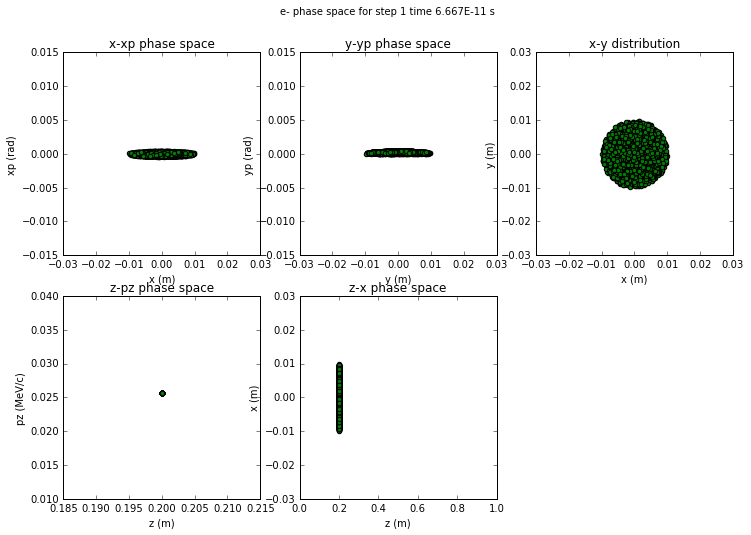

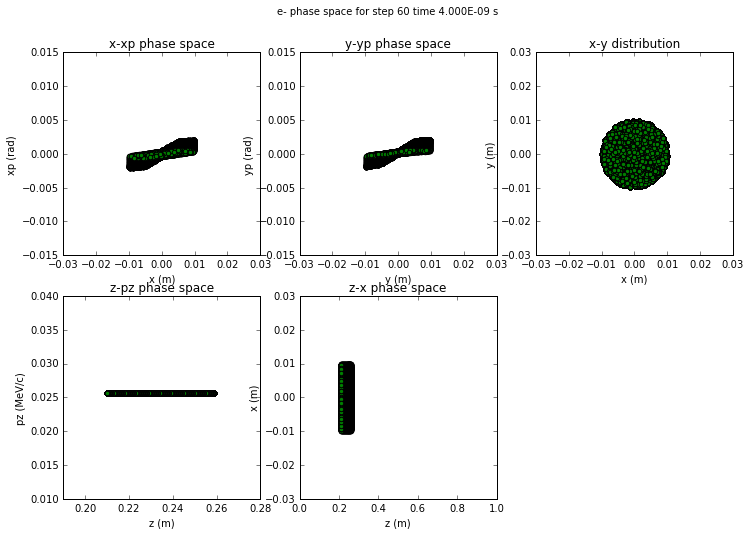

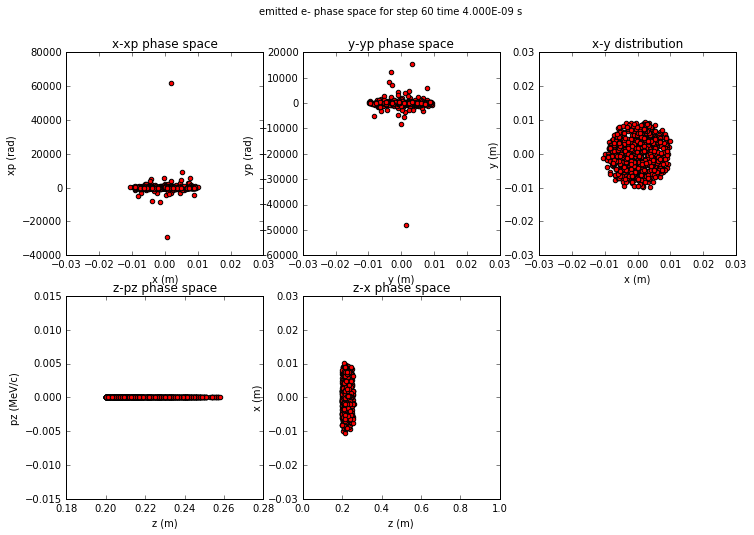

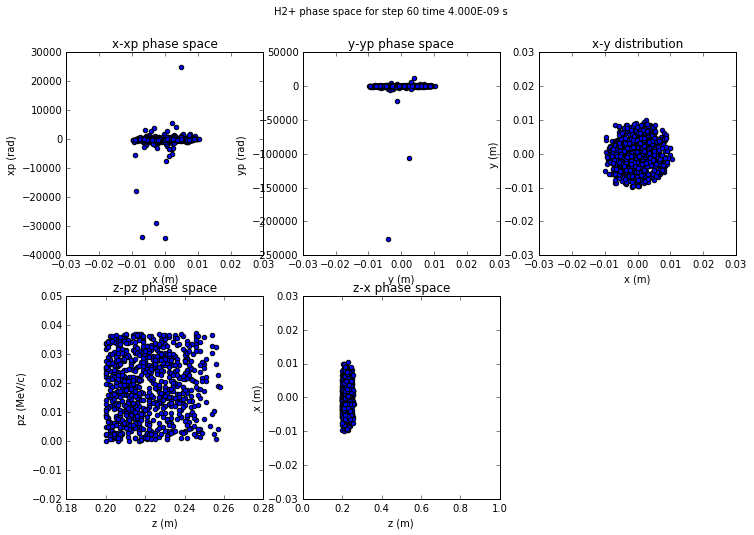

In [6]:
figs = []
def plotDecorate(fig,name):
    fig.suptitle("%s phase space for step %i time %.3E s" % (name,steps[i],times[i]))
    fig.axes[4].set_xlim(0.0,1.0) # z limits

for i in range(0,len(elecdata)):
    figs.append(plotphasespace(elecdata[i], color='g', decorator=lambda fig: plotDecorate(fig,"e-")))
    if len(emitelecdata[i]) > 0:
        figs.append(plotphasespace(emitelecdata[i], color='r', decorator=lambda fig: plotDecorate(fig,"emitted e-")))
    if len(h2pdata[i]) > 0:
        figs.append(plotphasespace(h2pdata[i], color='b', decorator=lambda fig: plotDecorate(fig,"H2+")))